In [1]:
import torch
import numpy as np
import math
import matplotlib.pyplot as plt

dtype = torch.float           
device = torch.device("cpu")

In [2]:
def Hub_the(z,om,H0):
    return H0*np.sqrt(om*pow(1+z,3)+1-om)

h_data = np.genfromtxt("./data/hubel.dat") 

In [64]:
Activation = torch.nn.SiLU()    #torch.nn.SELU(),#torch.nn.GELU(),#torch.nn.Tanh(),
    
model = torch.nn.Sequential(
    torch.nn.Linear(1, 10),
    Activation,
   # torch.nn.Linear(10,10),
    #Activation,
    torch.nn.Linear(10,1),
    torch.nn.Flatten(0, 1)
)


y = torch.from_numpy(h_data[:,1]).float()
err_y = torch.from_numpy(h_data[:,2]).float()

def loss_fn(y_pred,y):
    t1 = ((y_pred - y)/err_y).pow(2).sum()
    #t1 = (y_pred[:,0] - y).pow(2).sum()
    #t2 = (y_pred[:,1] -  err_y).pow(2).sum()
    return t1 #+ t2/len(h_data[:,0])

In [65]:
x = torch.from_numpy(h_data[:,0]).float()
x = torch.reshape(x,(39,1))

y_pred = model(x)
y_pred.size()

loss = loss_fn(y_pred,y)
loss.item()

13188.861328125

In [66]:
x = torch.from_numpy(h_data[:,0]).float()
x = torch.reshape(x,(39,1))

y_pred = model(x)

#x.reshape(-1,1)
#y_pred.size()
tot_par = sum([param.nelement() for param in model.parameters()])

loss = loss_fn(y_pred,y)
loss.item()

13188.861328125

In [69]:
learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
for t in range(50001):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    if t % 5000 == 0:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()
    #linear_layer = model[0]
    #print(linear_layer.weight)

0 30.052379608154297
5000 28.460289001464844
10000 27.233131408691406
15000 26.257904052734375
20000 25.47956085205078
25000 24.853979110717773
30000 24.34650421142578
35000 23.931007385253906
40000 23.588167190551758
45000 23.30380630493164
50000 23.06699562072754


tensor(72.7830, grad_fn=<SelectBackward0>)


<ErrorbarContainer object of 3 artists>

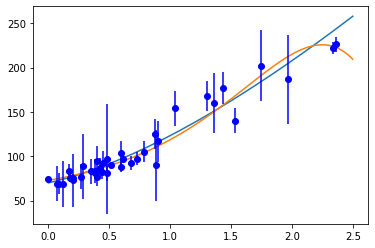

In [70]:
x_test = torch.linspace(0, 2.5, 2000, device=device, dtype=dtype)
x_test = torch.reshape(x_test,(2000,1))
y_th = Hub_the(x_test,0.3,70)
y_test = model(x_test)

print(y_test[0])

plt.plot(x_test,y_th)
plt.plot(x_test.detach().numpy().reshape(-1,),y_test.detach().numpy())
#plt.plot(x_test.detach().numpy().reshape(-1,),y_test.detach().numpy())
plt.errorbar(h_data[:,0],h_data[:,1],yerr=h_data[:,2],fmt="bo")

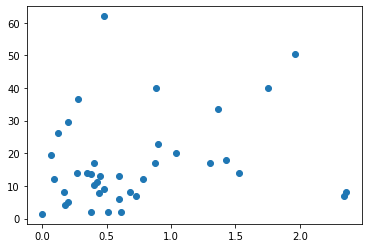

In [57]:
plt.scatter(h_data[:,0],h_data[:,2])